<a href="https://colab.research.google.com/github/khushi12-shukla/Data-visualization/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import plotly.express as px
df = pd.read_csv("escape_velocity.csv")
velocity = df["Velocity"].tolist()
escape = df["Escaped"].tolist()
representation = px.scatter(x=velocity,y=escape)
representation.show()

In [4]:
import numpy as np
velocity_a = np.array(velocity)
escape_a = np.array(escape)
m,c = np.polyfit(velocity_a,escape_a,1)
y=[]
for x in velocity_a:
  y_value = m*x+c
  y.append(y_value)
representation = px.scatter(x=velocity_a,y=escape_a)
representation.update_layout(shapes=[
  dict(
      type="line",
      y0=min(y),y1=max(y),
      x0=min(velocity_a),x1=max(velocity_a)
  )
]) 
representation.show()

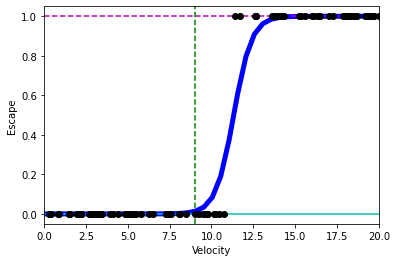

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = np.reshape(velocity,(len(velocity),1)) 
Y=np.reshape(escape,(len(escape)))
lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/(1+np.exp(-x))
X_test = np.linspace(0,100,200)
chances = model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,chances,color="blue",linewidth=5)
plt.axhline(y=0,color="c",linestyle="-")
plt.axhline(y=1,color="m",linestyle="--")
plt.axvline(x=X_test[18],color="g",linestyle="--")

plt.ylabel("Escape")
plt.xlabel("Velocity")
plt.xlim(0,20)
plt.show()

In [22]:
velocity_input = float(input("Please type the velocity"))
chances = model(X_test*lr.coef_+lr.intercept_).ravel()[0]
if chances <=0.01:
  print("The particle will not escape")
elif chances >=1:
  print("The particle will surely escape")
elif chances <0.05:
  print("The particle may not escape")
else:
  print("The particle may escape")

Please type the velocity12
The particle will not escape
